In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from mountain_goat.preprocessing import create_dataframe

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'list'>


In [3]:
#importing data
list_videos= create_dataframe('/home/william/code/ar10000/mountain_goat/raw_data/Videos')

In [4]:
import pandas as pd
import numpy as np
import ipdb
import matplotlib.pyplot as plt

In [5]:
# b=np.array(list_videos)

In [6]:
def check_nan_videos(videos:list):
    """takes in list of dataframes and returns a summary of the videos w.r.t the number of nan values"""
    vid_summary =[]
    for df in videos:
        num_nans= df['right_hand_x'].isnull().sum(axis=0)
        vid_id = df['frame_id'].to_list()[0]
        percent= num_nans/len(df)
        res= {'vid_id': vid_id, 'num_nans': num_nans, 'percent':percent}
        vid_summary.append(res)
    return pd.DataFrame(vid_summary)

In [7]:
check_nan_videos(list_videos)

,vid_id,num_nans,percent
0,Vid0_frame0,0,0.000000
1,Vid1_frame0,1,0.333333
2,Vid2_frame0,0,0.000000
3,Vid3_frame0,2,0.250000
4,Vid4_frame0,0,0.000000
5,Vid5_frame0,1,0.142857
6,Vid6_frame0,0,0.000000
7,Vid7_frame0,2,0.125000
8,Vid8_frame0,9,0.818182
9,Vid9_frame0,6,0.461538


In [8]:
#removing nan values in videos
list_videos_no_nan=[]
for df in list_videos:
    df.dropna(inplace=True)
    list_videos_no_nan.append(df)

In [9]:
list_videos_no_nan[6]

,left_hand_x,left_hand_y,left_hand_z,left_hand_visibility,right_hand_x,right_hand_y,right_hand_z,right_hand_visibility,left_foot_X,left_foot_y,left_foot_z,left_foot_visibility,right_foot_x,right_foot_y,right_foot_z,right_foot_visibility,frame_id
0,0.532031,0.440886,0.071137,0.801990,0.541932,0.409854,0.077898,0.899516,0.486777,0.762287,0.204766,0.624938,0.531914,0.773636,0.356364,0.508322,Vid6_frame0
1,0.526372,0.399049,0.183149,0.877898,0.666418,0.416072,0.139432,0.940520,0.497582,0.738588,0.404385,0.809983,0.528151,0.766134,0.410606,0.854742,Vid6_frame1
2,0.531081,0.423940,0.237809,0.987306,0.665734,0.422549,0.201827,0.951274,0.555867,0.775755,0.451753,0.893137,0.612543,0.842326,0.305632,0.994152,Vid6_frame2
3,0.531082,0.429528,0.278091,0.948088,0.663907,0.412553,0.305467,0.934903,0.565861,0.779172,0.497345,0.919920,0.741460,0.726596,0.311070,0.964896,Vid6_frame3


In [10]:
list_videos_no_nan[1]

,left_hand_x,left_hand_y,left_hand_z,left_hand_visibility,right_hand_x,right_hand_y,right_hand_z,right_hand_visibility,left_foot_X,left_foot_y,left_foot_z,left_foot_visibility,right_foot_x,right_foot_y,right_foot_z,right_foot_visibility,frame_id
0,0.372244,0.794365,0.218712,0.217721,0.413319,0.655106,0.029876,0.940237,0.442395,0.937344,0.310151,0.432954,0.518927,0.901869,0.075552,0.981248,Vid1_frame0
1,0.324394,0.559085,-0.117568,0.940010,0.413087,0.652774,-0.190815,0.840198,0.429968,0.941430,0.333007,0.893302,0.489483,0.894753,0.111330,0.991164,Vid1_frame1


In [11]:
list_videos_no_nan[6].iloc[-1];

In [12]:
list_videos_no_nan[0]

,left_hand_x,left_hand_y,left_hand_z,left_hand_visibility,right_hand_x,right_hand_y,right_hand_z,right_hand_visibility,left_foot_X,left_foot_y,left_foot_z,left_foot_visibility,right_foot_x,right_foot_y,right_foot_z,right_foot_visibility,frame_id
0,0.589909,0.632335,0.017695,0.979038,0.599054,0.629731,0.236454,0.598649,0.621598,0.996924,0.043276,0.932423,0.592326,0.873475,0.227800,0.412501,Vid0_frame0
1,0.589461,0.636212,0.067205,0.943232,0.597116,0.623054,0.248731,0.807566,0.504684,0.877904,0.000410,0.951526,0.582441,0.889536,0.263333,0.691773,Vid0_frame1
2,0.586185,0.636615,-0.032734,0.956099,0.551201,0.548031,0.067853,0.908572,0.508555,0.871219,0.052234,0.984537,0.575373,0.880990,0.279139,0.732718,Vid0_frame2
3,0.496721,0.474468,0.093421,0.951936,0.552609,0.499284,0.249713,0.292882,0.506810,0.870142,0.075443,0.961322,0.587560,0.867122,0.200329,0.869662,Vid0_frame3
4,0.495855,0.476878,0.109931,0.952740,0.556711,0.526334,0.274203,0.274135,0.500908,0.866105,0.029799,0.971205,0.519505,0.832364,0.201287,0.797794,Vid0_frame4
5,0.496913,0.474538,0.109403,0.974439,0.560459,0.517355,0.317288,0.361145,0.453708,0.804944,0.034454,0.980128,0.501772,0.832628,0.152219,0.910666,Vid0_frame5
6,0.506898,0.474587,0.113421,0.645940,0.498813,0.466899,0.203184,0.475411,0.452942,0.801482,0.053406,0.991887,0.497044,0.858069,0.059599,0.980884,Vid0_frame6
7,0.408746,0.432348,0.176485,0.898040,0.504704,0.479731,0.269304,0.336679,0.453038,0.799117,0.016117,0.996526,0.494146,0.823561,0.067873,0.986115,Vid0_frame7
8,0.406549,0.437734,0.231504,0.899562,0.488068,0.462111,0.306045,0.471260,0.456375,0.797140,0.119330,0.999394,0.562724,0.648757,0.219919,0.997602,Vid0_frame8
9,0.402931,0.440404,0.242728,0.940408,0.499160,0.303971,0.108565,0.992935,0.449322,0.797698,0.059584,0.999798,0.568217,0.653940,0.123546,0.998233,Vid0_frame9


In [13]:
y = []
X = []
for df in list_videos_no_nan:
    df = df.drop(columns='frame_id', axis=1)
    last_index = len(df)-1
    last_frame= df.iloc[-1]
    frames = df[:-1]
    y.append(np.array(last_frame))
    X.append(np.array(frames))
#     print(counter)

In [14]:
frames_to_plot=[]
for vid in X:
    frames_to_plot.append(vid.shape[0])

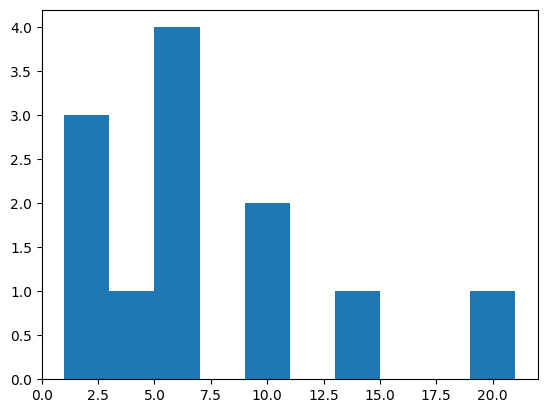

In [15]:
plt.hist(frames_to_plot);

In [18]:
#padding needs to be done
X_pad = pad_sequences(X, dtype='float32', padding='post', value=-1000)

In [19]:
X_pad.shape

(12, 21, 16)

In [20]:
X_pad_test = X_pad[11,:,:]
X_pad_train= X_pad[:11, :,:]

In [21]:
X_pad_train.shape

(11, 21, 16)

In [22]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [23]:
# model architecture 
def initialise():
    """initialize model"""
    #initialize sequential
    model = models.Sequential()
    #adding masking layer
    model.add(layers.Masking(mask_value=-1000))
    #adding rnn layers
    model.add(layers.LSTM(units=20, return_sequences=True, input_shape=(21, 16)))
    model.add(layers.LSTM(units=5, return_sequences=False))
    #adding dense layers
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(16, activation='linear'))
    
    return model

In [24]:
def compile_model(model):
    """compile model"""
    model.compile(loss= 'mse',
                  optimizer='adam',
                  metrics=["mae"]
        )
    return model

In [25]:
model = initialise()
model= compile_model(model)


2022-09-01 19:20:09.415656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/william/.pyenv/versions/3.8.12/envs/goat_env/lib/python3.8/site-packages/cv2/../../lib64:
2022-09-01 19:20:09.415770: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-01 19:20:09.415803: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-QOR5S2U2): /proc/driver/nvidia/version does not exist
2022-09-01 19:20:09.416432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler 

In [26]:
model

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    patience= 20,
    restore_best_weights=True
)

In [29]:
y_train=np.array(y)[:11, :]
y_test= np.array(y)[11, :]
print(y_test.shape)
y_train.shape

(16,)


(11, 16)

In [30]:
history =model.fit(
    X_pad_train,
    y_train,
    epochs= 500,
    validation_split=0.3,
    callbacks=[es],
    batch_size= 32,
    verbose = 1,
        )

Epoch 1/500
1/1 [==============================] - 32s 32s/step - loss: 0.3468 - mae: 0.5130 - val_loss: 0.2554 - val_mae: 0.4388
Epoch 2/500
1/1 [==============================] - 0s 217ms/step - loss: 0.3419 - mae: 0.5087 - val_loss: 0.2513 - val_mae: 0.4342
Epoch 3/500
1/1 [==============================] - 0s 212ms/step - loss: 0.3369 - mae: 0.5042 - val_loss: 0.2470 - val_mae: 0.4295
Epoch 4/500
1/1 [==============================] - 0s 207ms/step - loss: 0.3317 - mae: 0.4993 - val_loss: 0.2426 - val_mae: 0.4248
Epoch 5/500
1/1 [==============================] - 0s 254ms/step - loss: 0.3263 - mae: 0.4941 - val_loss: 0.2381 - val_mae: 0.4197
Epoch 6/500
1/1 [==============================] - 0s 248ms/step - loss: 0.3210 - mae: 0.4890 - val_loss: 0.2334 - val_mae: 0.4143
Epoch 7/500
1/1 [==============================] - 0s 241ms/step - loss: 0.3156 - mae: 0.4837 - val_loss: 0.2287 - val_mae: 0.4095
Epoch 8/500
1/1 [==============================] - 0s 256ms/step - loss: 0.3101 - ma

1/1 [==============================] - 0s 238ms/step - loss: 0.0780 - mae: 0.2200 - val_loss: 0.0906 - val_mae: 0.2532
Epoch 64/500
1/1 [==============================] - 0s 241ms/step - loss: 0.0762 - mae: 0.2173 - val_loss: 0.0897 - val_mae: 0.2516
Epoch 65/500
1/1 [==============================] - 0s 194ms/step - loss: 0.0744 - mae: 0.2146 - val_loss: 0.0889 - val_mae: 0.2501
Epoch 66/500
1/1 [==============================] - 0s 190ms/step - loss: 0.0727 - mae: 0.2119 - val_loss: 0.0881 - val_mae: 0.2487
Epoch 67/500
1/1 [==============================] - 0s 199ms/step - loss: 0.0711 - mae: 0.2093 - val_loss: 0.0872 - val_mae: 0.2474
Epoch 68/500
1/1 [==============================] - 0s 205ms/step - loss: 0.0695 - mae: 0.2067 - val_loss: 0.0865 - val_mae: 0.2459
Epoch 69/500
1/1 [==============================] - 0s 206ms/step - loss: 0.0679 - mae: 0.2042 - val_loss: 0.0857 - val_mae: 0.2445
Epoch 70/500
1/1 [==============================] - 0s 217ms/step - loss: 0.0664 - mae: 0

Epoch 125/500
1/1 [==============================] - 0s 200ms/step - loss: 0.0374 - mae: 0.1445 - val_loss: 0.0692 - val_mae: 0.2005
Epoch 126/500
1/1 [==============================] - 0s 198ms/step - loss: 0.0372 - mae: 0.1442 - val_loss: 0.0689 - val_mae: 0.2000
Epoch 127/500
1/1 [==============================] - 0s 206ms/step - loss: 0.0370 - mae: 0.1439 - val_loss: 0.0686 - val_mae: 0.1996
Epoch 128/500
1/1 [==============================] - 0s 241ms/step - loss: 0.0369 - mae: 0.1435 - val_loss: 0.0684 - val_mae: 0.1992
Epoch 129/500
1/1 [==============================] - 0s 199ms/step - loss: 0.0367 - mae: 0.1432 - val_loss: 0.0681 - val_mae: 0.1988
Epoch 130/500
1/1 [==============================] - 0s 210ms/step - loss: 0.0365 - mae: 0.1429 - val_loss: 0.0679 - val_mae: 0.1984
Epoch 131/500
1/1 [==============================] - 0s 228ms/step - loss: 0.0363 - mae: 0.1426 - val_loss: 0.0677 - val_mae: 0.1980
Epoch 132/500
1/1 [==============================] - 0s 200ms/step - 

1/1 [==============================] - 0s 216ms/step - loss: 0.0274 - mae: 0.1248 - val_loss: 0.0563 - val_mae: 0.1821
Epoch 187/500
1/1 [==============================] - 0s 218ms/step - loss: 0.0273 - mae: 0.1245 - val_loss: 0.0562 - val_mae: 0.1820
Epoch 188/500
1/1 [==============================] - 0s 236ms/step - loss: 0.0271 - mae: 0.1242 - val_loss: 0.0560 - val_mae: 0.1818
Epoch 189/500
1/1 [==============================] - 0s 236ms/step - loss: 0.0270 - mae: 0.1238 - val_loss: 0.0559 - val_mae: 0.1816
Epoch 190/500
1/1 [==============================] - 0s 259ms/step - loss: 0.0268 - mae: 0.1235 - val_loss: 0.0557 - val_mae: 0.1814
Epoch 191/500
1/1 [==============================] - 0s 246ms/step - loss: 0.0267 - mae: 0.1232 - val_loss: 0.0556 - val_mae: 0.1813
Epoch 192/500
1/1 [==============================] - 0s 202ms/step - loss: 0.0266 - mae: 0.1229 - val_loss: 0.0554 - val_mae: 0.1812
Epoch 193/500
1/1 [==============================] - 0s 202ms/step - loss: 0.0264 -

Epoch 248/500
1/1 [==============================] - 0s 226ms/step - loss: 0.0187 - mae: 0.1046 - val_loss: 0.0548 - val_mae: 0.1826
Epoch 249/500
1/1 [==============================] - 0s 208ms/step - loss: 0.0186 - mae: 0.1042 - val_loss: 0.0551 - val_mae: 0.1834
Epoch 250/500
1/1 [==============================] - 0s 194ms/step - loss: 0.0184 - mae: 0.1039 - val_loss: 0.0554 - val_mae: 0.1840
Epoch 251/500
1/1 [==============================] - 0s 227ms/step - loss: 0.0183 - mae: 0.1035 - val_loss: 0.0555 - val_mae: 0.1843


In [31]:
X_pad_test=np.array([X_pad_test])
X_pad_test.shape

(1, 21, 16)

In [33]:
y_test = np.array([y_test])

In [34]:
y_test.shape

(1, 16)

In [35]:
model.evaluate(X_pad_test, y_test)

1/1 [==============================] - 0s 57ms/step - loss: 0.0503 - mae: 0.1709


[0.05029606819152832, 0.17092512547969818]